# Kaggle Compitition Notebook

- `Author:` **Muhammad Usman**
- `Email:` **usmanashraf4360@gmail.com**

# Bank churn dataset

In [65]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# remove warnings
import warnings
warnings.filterwarnings('ignore')

In [66]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')
df_submission=pd.read_csv('sample_submission.csv')

# Lets Explore Train data

In [67]:
df_train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [68]:
df=df_train.copy()

In [69]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,165034.0,8.251650e+04,47641.356500,0.00,41258.25,82516.5,1.237748e+05,165033.00
CustomerId,165034.0,1.569201e+07,71397.816791,15565701.00,15633141.00,15690169.0,1.575682e+07,15815690.00
CreditScore,165034.0,6.564544e+02,80.103340,350.00,597.00,659.0,7.100000e+02,850.00
Age,165034.0,3.812589e+01,8.867205,18.00,32.00,37.0,4.200000e+01,92.00
Tenure,165034.0,5.020353e+00,2.806159,0.00,3.00,5.0,7.000000e+00,10.00
Balance,165034.0,5.547809e+04,62817.663278,0.00,0.00,0.0,1.199395e+05,250898.09
NumOfProducts,165034.0,1.554455e+00,0.547154,1.00,1.00,2.0,2.000000e+00,4.00
HasCrCard,165034.0,7.539537e-01,0.430707,0.00,1.00,1.0,1.000000e+00,1.00
IsActiveMember,165034.0,4.977702e-01,0.499997,0.00,0.00,0.0,1.000000e+00,1.00
EstimatedSalary,165034.0,1.125748e+05,50292.865585,11.58,74637.57,117948.0,1.551525e+05,199992.48


In [70]:
df.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [71]:
df.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [72]:
df['EstimatedSalary'].value_counts()

EstimatedSalary
88890.05     178
140941.47    107
167984.72    100
90876.95      98
129964.94     98
            ... 
102747.73      1
170593.45      1
109179.48      1
60538.47       1
71173.03       1
Name: count, Length: 55298, dtype: int64

In [73]:
cat_col=['Geography','Gender','Tenure','NumOfProducts','HasCrCard','IsActiveMember','Exited']
num_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']


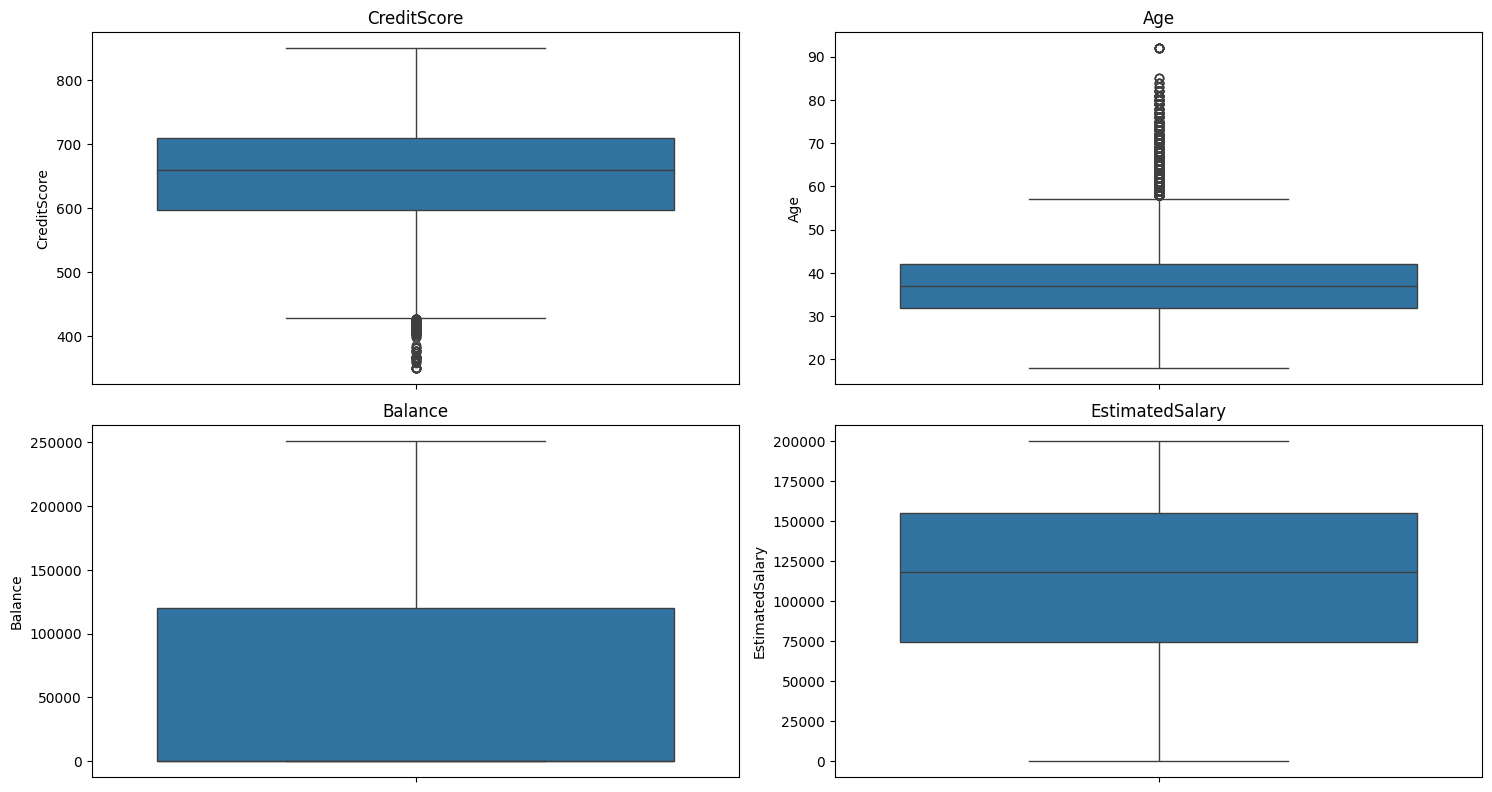

In [74]:
fig = plt.figure(figsize=(15, 8))

for idx, col in enumerate(num_cols):
    plt.subplot(2, 2, idx+1)
    sns.boxplot(df[col])
    plt.title(f'{col}')
fig.tight_layout(pad=1.0)

In [75]:
# check value counts of categorical columns
for col in cat_col:
    print(df[col].value_counts())
    print()

Geography
France     94215
Spain      36213
Germany    34606
Name: count, dtype: int64

Gender
Male      93150
Female    71884
Name: count, dtype: int64

Tenure
2     18045
7     17810
4     17554
8     17520
5     17268
1     16760
9     16709
3     16630
6     15822
10     5909
0      5007
Name: count, dtype: int64

NumOfProducts
2    84291
1    77374
3     2894
4      475
Name: count, dtype: int64

HasCrCard
1.0    124428
0.0     40606
Name: count, dtype: int64

IsActiveMember
0.0    82885
1.0    82149
Name: count, dtype: int64

Exited
0    130113
1     34921
Name: count, dtype: int64



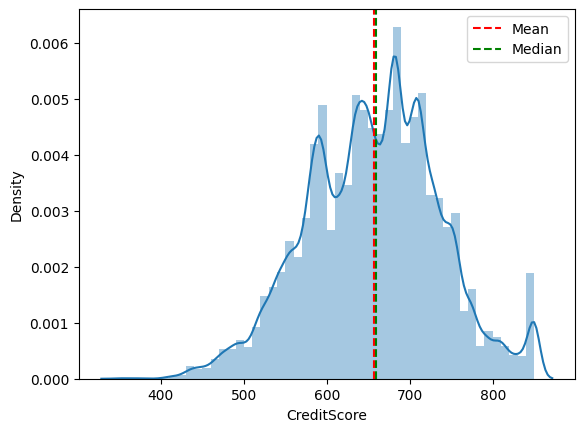

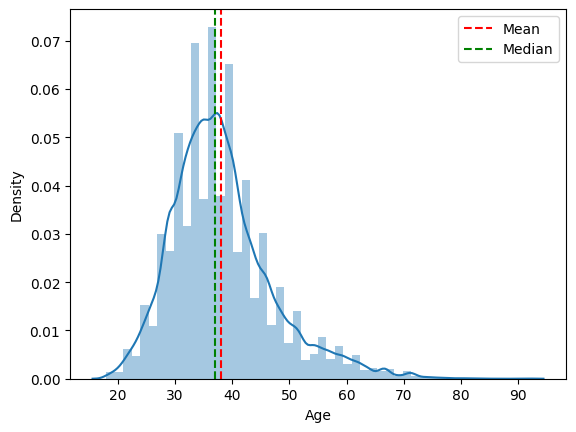

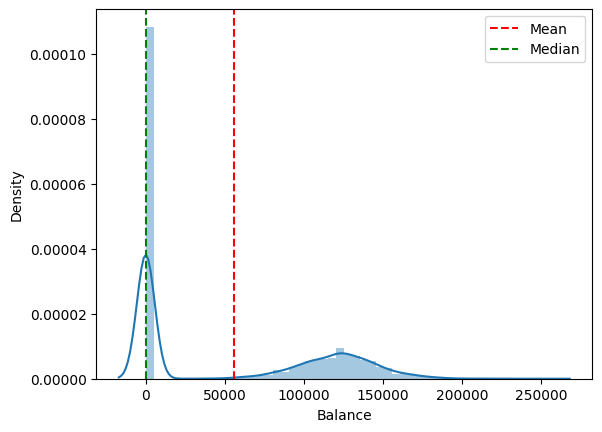

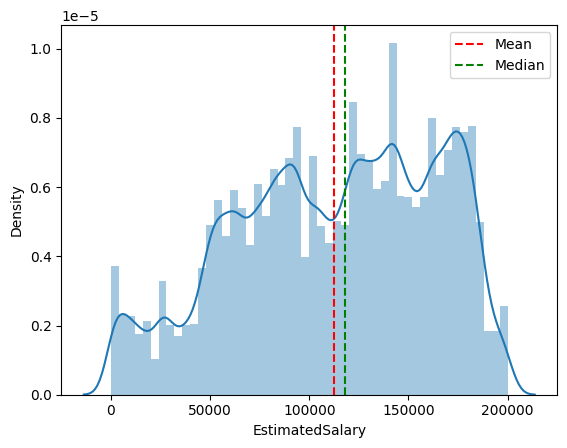

In [76]:
for col in num_cols:
    sns.distplot(df[col],kde=True)
    plt.axvline(df[col].mean(), color='r', linestyle='--', label='Mean')
    plt.axvline(df[col].median(), color='g', linestyle='--', label='Median')
    plt.legend()
    plt.show()

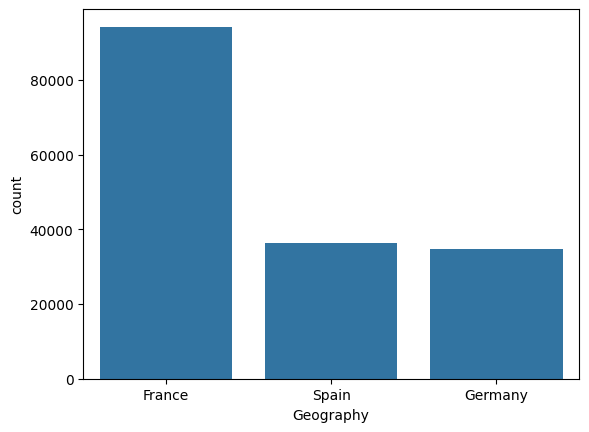

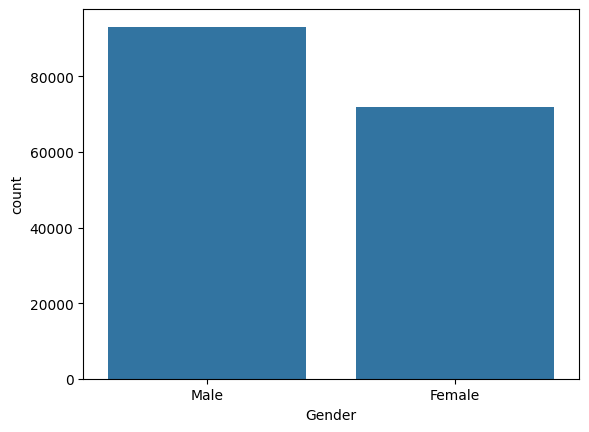

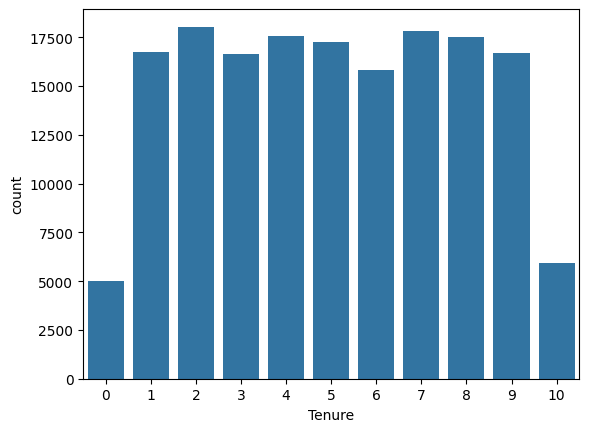

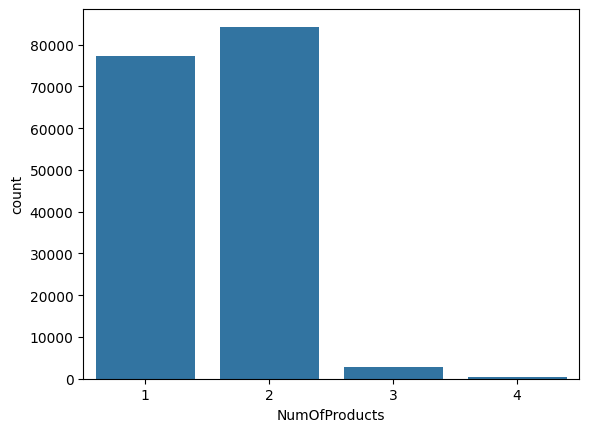

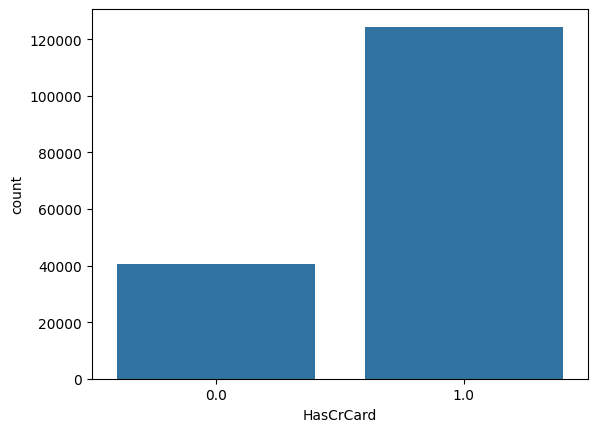

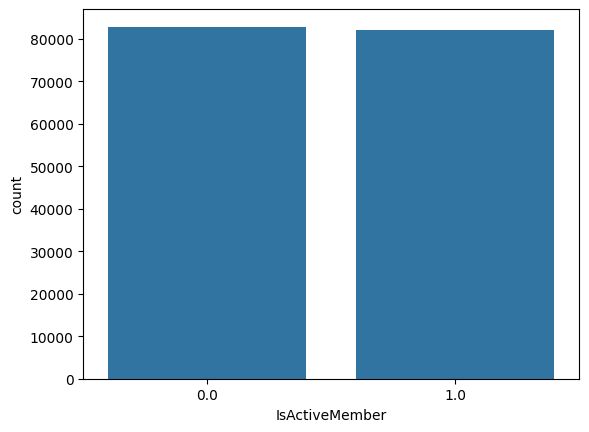

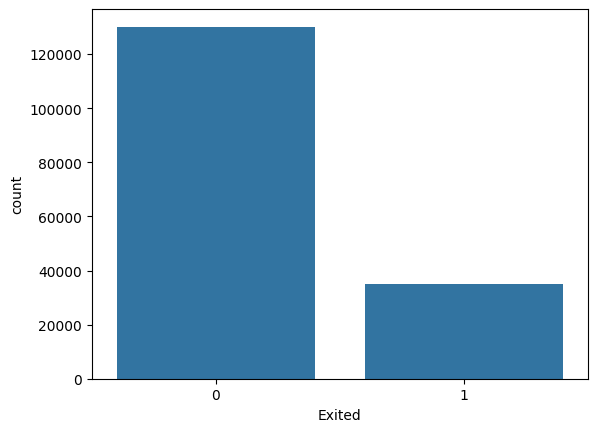

In [77]:
# Count plot of all Categorical Columns
for col in cat_col:
    sns.countplot(df,x=df[col])
    plt.show()

In [78]:
df=df.drop(['id','CustomerId','Surname'],axis=1)

In [79]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [80]:
# Encode columns Geography and Gender by label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Geography']=le.fit_transform(df['Geography'])
df['Gender']=le.fit_transform(df['Gender'])

In [81]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,0,1,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,0,1,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,0,1,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,0,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,2,1,33.0,5,0.00,2,1.0,1.0,15068.83,0


Text(0.5, 1.0, 'Age Hist Plot')

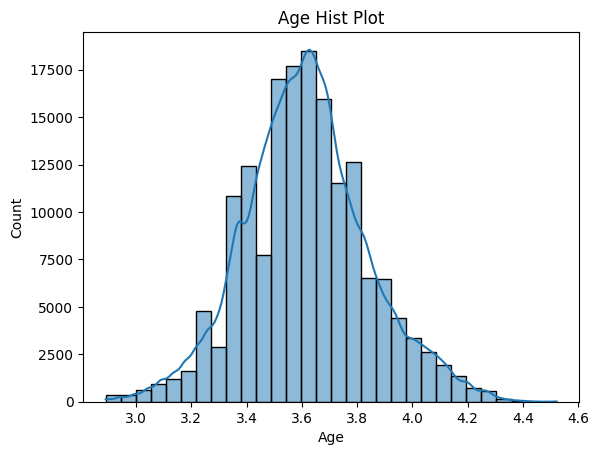

In [82]:
# Age Histogram After Log Transform
sns.histplot(np.log(df['Age']),bins=30,kde=True)
plt.title('Age Hist Plot')

In [57]:
# Feature Scaling by Minmax Scaler
from sklearn.preprocessing import StandardScaler,MinMaxScaler

scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
#df_test[num_cols] = scaler.transform(df[num_cols])

In [83]:
# Split Data into X and Y
x=df.drop('Exited',axis=1)
y=df['Exited']

In [84]:
# Split data into training and testing set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Create Neural Network by tensorflow

In [61]:
# Import tensorflow
import tensorflow as tf

# Build the model
model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(64,activation='relu',input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(8,activation='relu'),
    #tf.keras.layers.Dense(8,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')])
# Compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


Epoch 1/25
4126/4126 [==============================] - 14s 3ms/step - loss: 135.6252 - accuracy: 0.6764 - val_loss: 57.6044 - val_accuracy: 0.7822
Epoch 2/25
4126/4126 [==============================] - 13s 3ms/step - loss: 32.4309 - accuracy: 0.6817 - val_loss: 5.7086 - val_accuracy: 0.7488
Epoch 3/25
4126/4126 [==============================] - 13s 3ms/step - loss: 8.9471 - accuracy: 0.6812 - val_loss: 2.2185 - val_accuracy: 0.7891
Epoch 4/25
4126/4126 [==============================] - 13s 3ms/step - loss: 1.5266 - accuracy: 0.7382 - val_loss: 0.5198 - val_accuracy: 0.7892
Epoch 5/25
4126/4126 [==============================] - 14s 3ms/step - loss: 0.5176 - accuracy: 0.7880 - val_loss: 0.5149 - val_accuracy: 0.7892
Epoch 6/25
4126/4126 [==============================] - 13s 3ms/step - loss: 0.5277 - accuracy: 0.7881 - val_loss: 0.5157 - val_accuracy: 0.7893
Epoch 7/25
4126/4126 [==============================] - 14s 3ms/step - loss: 0.5168 - accuracy: 0.7882 - val_loss: 0.5149 - va

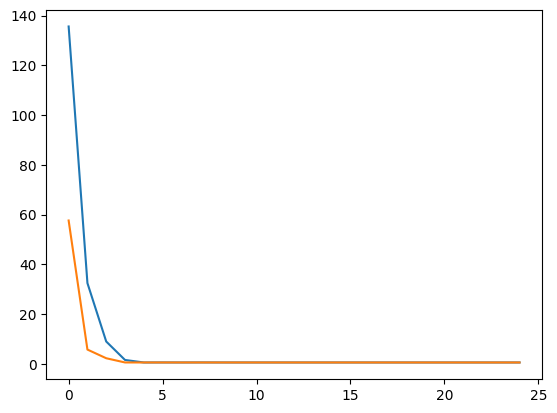

In [85]:
# Train the model
history=model.fit(x_train,y_train,epochs=25,batch_size=32,verbose=1,validation_data=(x_test,y_test))

# Plot training and testing loss and validation accuracy
fig,ax=plt.subplots()
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
plt.show() 



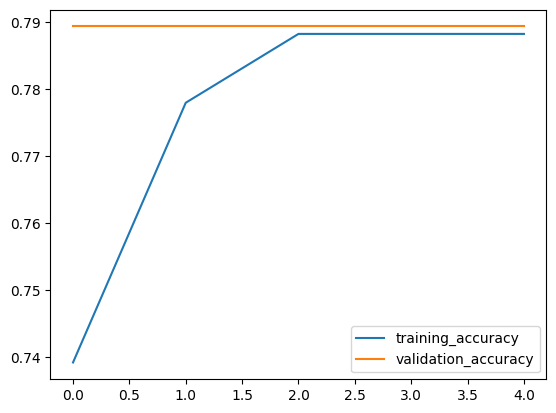

In [75]:
fig,ax=plt.subplots()
ax.plot(history.history['accuracy'],label='training_accuracy')
ax.plot(history.history['val_accuracy'],label='validation_accuracy')
plt.legend()
plt.show()

# XGBoost Classifier

0.865513375950556
0.7536290322580645
0.5374550682961898
0.6274443978178766


<Axes: >

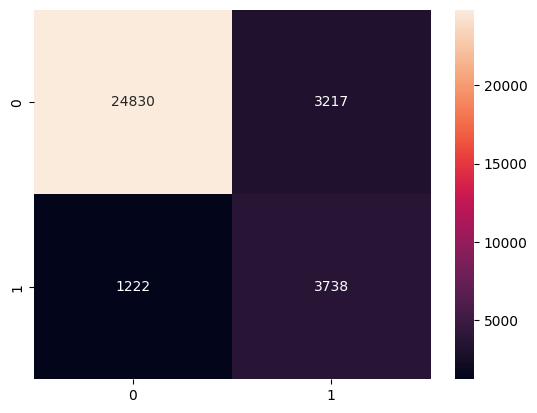

In [91]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,accuracy_score
xgb=GradientBoostingClassifier()
xgb.fit(x_train,y_train)

y_pred=xgb.predict(x_test)

print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

sns.heatmap(confusion_matrix(y_pred,y_test), annot=True,fmt='d')

In [85]:
# Convert categorical columns to numerical values
df_test=df_test.drop(['id','CustomerId','Surname'],axis=1)


In [86]:
df_test.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [88]:
# Encode Geopraphy and Gender column by label encoder
df_test['Geography']=le.fit_transform(df_test['Geography'])
df_test['Gender']=le.fit_transform(df_test['Gender'])

In [90]:
y_pred=xgb.predict_proba(df_test)
df_submission['Exited']=y_pred[:,1]
df_submission.to_csv('submission.csv',index=False)